# 2021-05-24: Checking antenna log of B4R/PJ020941.3

In [1]:
# standard library
from pathlib import Path


# dependencies
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
from jupyter_io import savefig_in_notebook
from taniguchi_2021_analysis import load_data_xffts


# data directory
DATA = Path().resolve().parents[1] / "data" 

## Load data

In [2]:
target = "PJ020941.3"
obsnum_cal = "086889"
obsnum_sci = "086890"
ifnum = "01"
sideband = "LSB"
T_amb = 273.0
ch_bin = 256

nc_tel_cal = DATA / "lmttpm_20191126_086889_00_01.nc"
nc_tel_sci = DATA / "lmttpm_20191126_086890_00_01.nc"
nc_cal = DATA / "xffts_20191126051026_086889_01.nc"
nc_sci = DATA / "xffts_20191126051059_086890_01.nc"

P_cal = load_data_xffts(nc_cal, nc_tel_cal, sideband, "AZEL").sortby("t")
P_sci = load_data_xffts(nc_sci, nc_tel_sci, sideband, "AZEL").sortby("t")
P_all = xr.concat([P_cal, P_sci], dim="t")

## Plot antenna log

- Position offset of OFF from ON is (dAz, dEl) = (+1 arcmin, 0 arcmin)

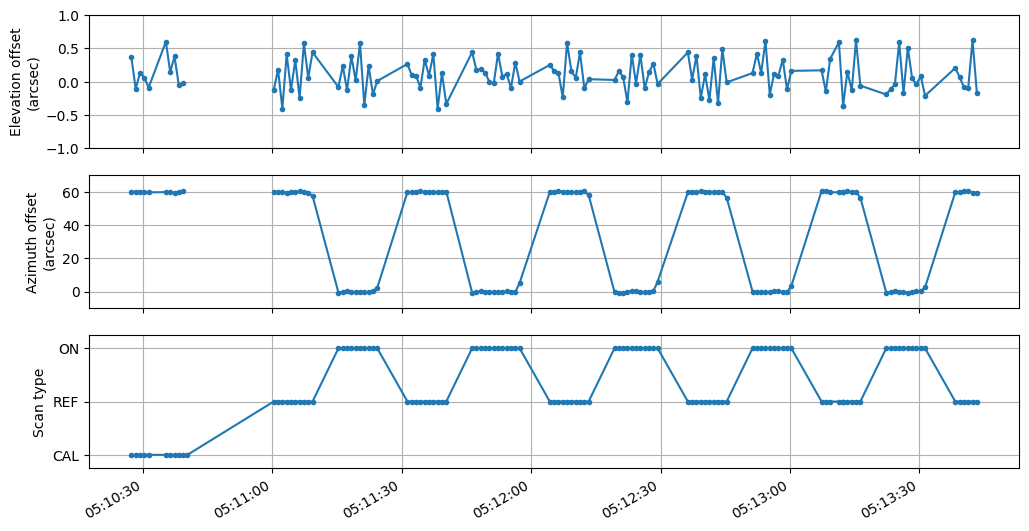

In [3]:
fig, axes = plt.subplots(3, 1, figsize=(12, 6), dpi=100)

index = slice(0, 120)

ax = axes[0]
(3600 * P_all.y[index]).plot(ax=ax, marker="o", ms=3, ylim=(-1, 1))
ax.set_xlabel("")
ax.set_xticklabels([])
ax.set_ylabel("Elevation offset\n(arcsec)")
ax.grid()

ax = axes[1]
(3600 * P_all.x[index]).plot(ax=ax, marker="o", ms=3, ylim=(-10, 70))
ax.set_xlabel("")
ax.set_xticklabels([])
ax.set_ylabel("Azimuth offset\n(arcsec)")
ax.grid()

ax = axes[2]
((P_all.scantype[index] == "ON").astype(int) - (P_all.scantype[index] == "CAL").astype(int)).plot(ax=ax, marker="o", ms=3, ylim=(-1.25, 1.25))
ax.set_xlabel("")
ax.set_ylabel("Scan type")
ax.set_yticks([-1, 0, 1])
ax.set_yticklabels(["CAL", "REF", "ON"])
ax.grid()

savefig_in_notebook()

## Plot typical antenna slewing time between ON and OFF

- Typically 6 - 7 s

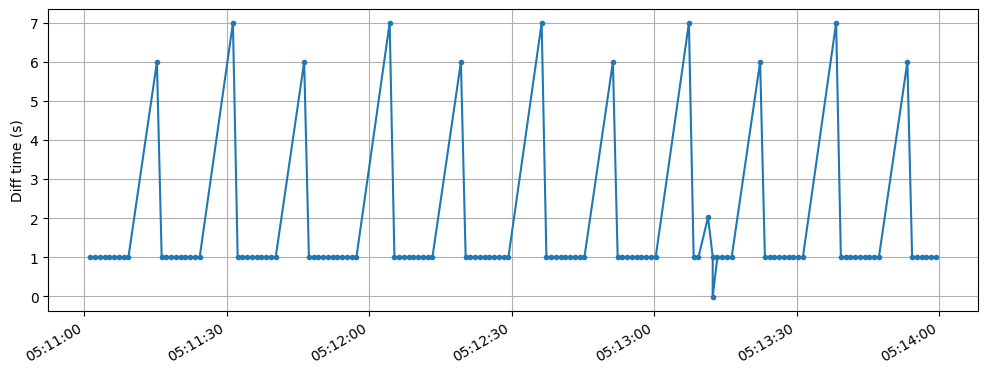

In [4]:
fig, ax = plt.subplots(figsize=(12, 4), dpi=100)

(P_sci[index].t.diff("t").astype(float) * 1e-9).plot.line(ax=ax, marker="o", ms=3)
ax.set_xlabel("")
ax.set_ylabel("Diff time (s)")
ax.grid()

savefig_in_notebook()